<h3><u>STOCK PRICE PREDICTION</u></h3>

In [293]:
import pandas_datareader as pdr
from dotenv import load_dotenv
import os
import requests
import pandas as pd
from io import StringIO

In [294]:
# colecting the api key of tiingo website
load_dotenv()
key = os.getenv('API_KEY')

In [295]:
# collecting apple stock price data
url = f'https://api.tiingo.com/tiingo/daily/AAPL/prices'
params = {
    'token': key,
    'startDate': '2020-01-01',
    'endDate': '2024-10-10'
}
response = requests.get(url, params=params)
if response.status_code == 200:
    df = pd.read_json(StringIO(response.text))
    print(df.head())
else:
    print(f"Error: {response.status_code}, {response.text}")

                       date   close    high     low    open    volume  \
0 2020-01-02 00:00:00+00:00  300.35  300.60  295.19  296.24  33911864   
1 2020-01-03 00:00:00+00:00  297.43  300.58  296.50  297.15  36633878   
2 2020-01-06 00:00:00+00:00  299.80  299.96  292.75  293.79  29644644   
3 2020-01-07 00:00:00+00:00  298.39  300.90  297.48  299.84  27877655   
4 2020-01-08 00:00:00+00:00  303.19  304.44  297.16  297.16  33090946   

    adjClose    adjHigh     adjLow    adjOpen  adjVolume  divCash  splitFactor  
0  72.877480  72.938141  71.625448  71.880222  135647456      0.0            1  
1  72.168966  72.933288  71.943309  72.101026  146535512      0.0            1  
2  72.744027  72.782850  71.033402  71.285750  118578576      0.0            1  
3  72.401902  73.010933  72.181098  72.753733  111510620      0.0            1  
4  73.566583  73.869885  72.103453  72.103453  132363784      0.0            1  


In [296]:
# storing the data in csv file
df.to_csv('AAPL.csv')

In [297]:
df = pd.read_csv('AAPL.csv')
df.head()

,Unnamed: 0,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,2020-01-02 00:00:00+00:00,300.35,300.60,295.19,296.24,33911864,72.877480,72.938141,71.625448,71.880222,135647456,0.0,1
1,1,2020-01-03 00:00:00+00:00,297.43,300.58,296.50,297.15,36633878,72.168966,72.933288,71.943309,72.101026,146535512,0.0,1
2,2,2020-01-06 00:00:00+00:00,299.80,299.96,292.75,293.79,29644644,72.744027,72.782850,71.033402,71.285750,118578576,0.0,1
3,3,2020-01-07 00:00:00+00:00,298.39,300.90,297.48,299.84,27877655,72.401902,73.010933,72.181098,72.753733,111510620,0.0,1
4,4,2020-01-08 00:00:00+00:00,303.19,304.44,297.16,297.16,33090946,73.566583,73.869885,72.103453,72.103453,132363784,0.0,1


In [337]:
# I'm only training this odel to predict the close column data
df1 = df.reset_index()['close']
df1.tail()

1197    226.80
1198    221.69
1199    225.77
1200    229.54
1201    229.04
Name: close, dtype: float64

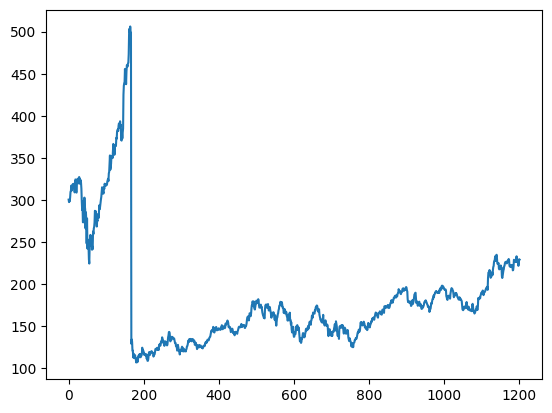

In [338]:
# plotting the data
import matplotlib.pyplot as plt
plt.plot(df1)

In [339]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [340]:
# pre-processing the data
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.48468378],
       [0.47737007],
       [0.4833062 ],
       ...,
       [0.29788353],
       [0.30732624],
       [0.30607389]])

In [341]:
df1.shape

(1202, 1)

In [342]:
# calculating and storing training and test data
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data, test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [343]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [344]:
# creating input and output pair
time_step = 400
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [345]:
# reshaping the data
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [346]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import LSTM

In [347]:
# creating the layered LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(400,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [348]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_21 (LSTM)                  │ (None, 400, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_22 (LSTM)                  │ (None, 400, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_23 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [349]:
# training the model
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 376ms/step - loss: 0.0064 - val_loss: 0.0050
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 354ms/step - loss: 8.8743e-04 - val_loss: 0.0214
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 378ms/step - loss: 9.9721e-04 - val_loss: 0.0082
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 356ms/step - loss: 8.2206e-04 - val_loss: 0.0138
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 353ms/step - loss: 6.6964e-04 - val_loss: 0.0144
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 375ms/step - loss: 6.5166e-04 - val_loss: 0.0088
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 377ms/step - loss: 5.9829e-04 - val_loss: 0.0117
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 379ms/step - loss: 5.5791e-04 - val_loss: 0.0084
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 378ms/step - loss: 4.7394e-04 - val_loss: 0.0069
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 365ms/step - loss: 4.8262e-04 - val_loss: 0.0056
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 366ms/step - loss: 4.2959e-04 - val_loss: 0.0041
Epoch 12/100
6/6 ━━━━━━

In [350]:
import tensorflow as tf

In [351]:
# predicting the data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [352]:
# Inverse tranforming the output
train_predict = scaler.inverse_transform(np.array(train_predict))
test_predict = scaler.inverse_transform(np.array(test_predict))

In [353]:
import math
from sklearn.metrics import mean_squared_error
# finding the euclidean distance between the actual and predicted data
math.sqrt(mean_squared_error(Y_train, train_predict))

152.61611993226964

In [354]:
math.sqrt(mean_squared_error(Y_test, test_predict))

218.49077181738994

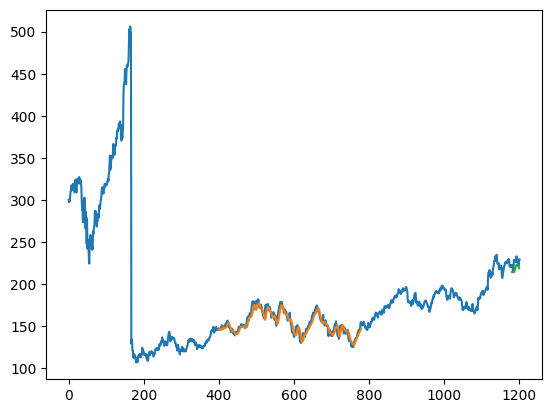

In [358]:
# plotting the actual and predicted data
look_back = 400
train_predictPlot = np.empty_like(df1)
train_predictPlot[:,:] = np.nan
train_predictPlot[look_back:len(train_predict)+look_back,:] = train_predict
test_predictPlot = np.empty_like(df1)
test_predictPlot[:,:] = np.nan
test_predictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:] = test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(train_predictPlot)
plt.plot(test_predictPlot)
plt.show()

In [359]:
len(test_data), len(train_data)

(421, 781)

In [360]:
x_input = test_data[21:].reshape(1,-1)
x_input.shape

(1, 400)

In [361]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [362]:
# calcuating the future 30 days output
lst_output=[]
n_step=400
i=0
while(i<30):
    if(len(temp_input)>400):
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_step, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
    else:
        x_input = x_input.reshape((1, n_step, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
    i += 1
print(lst_output)

[0.28212363]
401
1 day input [0.1092799  0.11458986 0.11559173 0.12275517 0.12062617 0.12663745
 0.13134627 0.12771446 0.13046963 0.13377583 0.12884158 0.12726362
 0.13507827 0.13906074 0.14542267 0.14860363 0.1472511  0.14256731
 0.14482154 0.13823419 0.13515341 0.13340013 0.14707577 0.14619912
 0.14624922 0.14935504 0.15226049 0.14980589 0.14572323 0.14649969
 0.14259236 0.14256731 0.15421415 0.15739512 0.15716969 0.15453976
 0.15180964 0.14765185 0.16713838 0.16696306 0.16262993 0.16710081
 0.16758923 0.16463369 0.16338134 0.16338134 0.16493425 0.17084534
 0.17112085 0.16871634 0.16210394 0.16280526 0.16568566 0.17179712
 0.1764809  0.17635567 0.183469   0.18562304 0.18219161 0.18126487
 0.17778334 0.18467126 0.18564809 0.19273638 0.19153413 0.19313713
 0.19829681 0.19556669 0.19579211 0.19316218 0.20077646 0.19997495
 0.19644333 0.20343143 0.20641202 0.20726362 0.21823419 0.2144521
 0.21162179 0.21282405 0.20999374 0.20480902 0.20348153 0.20771446
 0.20964308 0.21001879 0.21828428 

In [370]:
day_new=np.arange(1,401)
day_pred=np.arange(401,431)

In [371]:
import matplotlib.pyplot as plt

In [372]:
len(df1)

1202

In [373]:
df3 = df1.tolist()
df3.extend(lst_output)

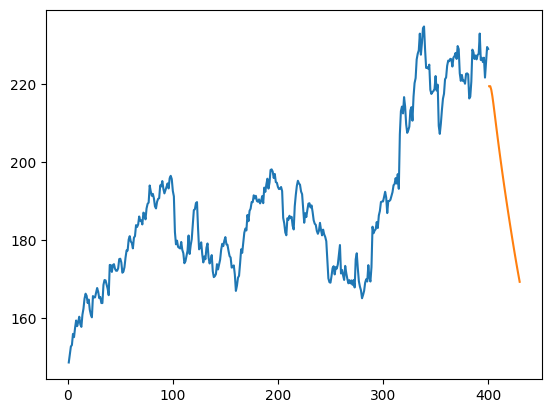

In [374]:
# plotting the graph for the future 30 days prediction
plt.plot(day_new, scaler.inverse_transform(df1[802:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

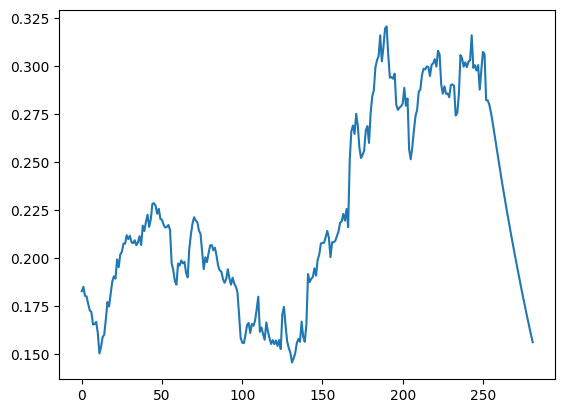

In [377]:
# plotting the scaled data
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[950:])

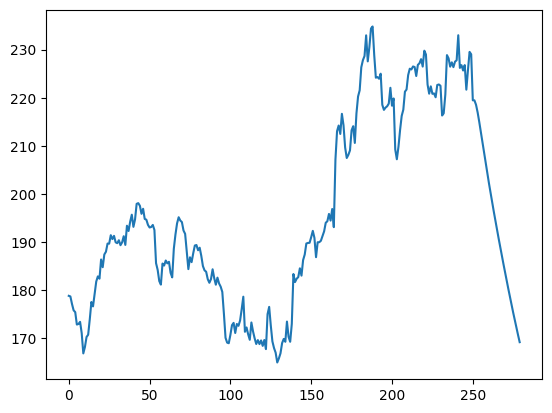

In [378]:
# plotting the actual future 30 days predicted data
plt.plot(scaler.inverse_transform(df3[952:]))